<a href="https://colab.research.google.com/github/shivangisharma2103/Flight-Delay-Prediction/blob/main/FinalP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive
%cd My\ Drive
%cd dataset

/content/drive
/content/drive/My Drive
/content/drive/My Drive/dataset


Reading the file that contains Airlines data

In [ ]:
import pandas as pd
df = pd.read_csv("airlines.csv")
df


,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


Reading the files containing Airports data

In [ ]:
df = pd.read_csv("airports.csv")
df

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


reading flight details

In [ ]:
df = df = pd.read_csv("flights.csv")
df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


I've concerted the date in yyyy-mm-dd format for convinience 

In [ ]:
df['DATE'] = pd.to_datetime(df[['YEAR','MONTH', 'DAY']])
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31


we see that the hour of departure is in float, where the first 2 nos. denaote hours and last 2 minutes. So we try and merge the take off hour with date.

In [ ]:
import numpy as np
import datetime
def format_hours(hours):
    if pd.isnull(hours):
        return np.nan
    else:
        if hours == 2400:
           hours = 0
      
        hours = "{0:04d}".format(int(hours))
        phours = datetime.time(int(hours[0:2]), int(hours[2:4]))
        return phours

def combine_date_hours(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])

def create_flight_time(df, col):    
    list=[]
    for index, cols in df[['DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            list.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            list.append(combine_date_hours(cols))
        else:
            cols[1] = format_hours(cols[1])
            list.append(combine_date_hours(cols))
    return pd.Series(list)

I'm finally keeping the variables that are required and re-organize the columns 

In [ ]:
df['SCHEDULED_DEPARTURE'] = create_flight_time(df, 'SCHEDULED_DEPARTURE')
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].apply(format_hours)
df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].apply(format_hours)
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].apply(format_hours)
#__________________________________________________________________________
df.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME',
             'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]

,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DEPARTURE_TIME,ARRIVAL_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
0,2015-01-01 00:05:00,04:30:00,23:54:00,04:08:00,-11.0,-22.0
1,2015-01-01 00:10:00,07:50:00,00:02:00,07:41:00,-8.0,-9.0
2,2015-01-01 00:20:00,08:06:00,00:18:00,08:11:00,-2.0,5.0
3,2015-01-01 00:20:00,08:05:00,00:15:00,07:56:00,-5.0,-9.0
4,2015-01-01 00:25:00,03:20:00,00:24:00,02:59:00,-1.0,-21.0
5,2015-01-01 00:25:00,06:02:00,00:20:00,06:10:00,-5.0,8.0


finding the shape of the dataframe

In [ ]:
df.shape

(5819079, 32)

In [ ]:
#checking if missing data is present
df.isnull().values.any()

True

In [ ]:
#checking where the missing data is present 
df.isnull().sum()


YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
DATE                         0
dtype: i

In [ ]:
#here we are reducing the columns ( which acc to me will help in the flight delay prediction)
df = df[['AIRLINE','FLIGHT_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT','SCHEDULED_DEPARTURE','DEPARTURE_TIME','DEPARTURE_DELAY','SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','SCHEDULED_ARRIVAL','ARRIVAL_TIME','ARRIVAL_DELAY', 'TAXI_OUT', 'TAXI_IN']]
df.isnull().sum()

AIRLINE                     0
FLIGHT_NUMBER               0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
DEPARTURE_DELAY         86153
SCHEDULED_TIME              6
ELAPSED_TIME           105071
AIR_TIME               105071
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY          105071
TAXI_OUT                89047
TAXI_IN                 92513
dtype: int64

In [ ]:
df[df.isnull().values.any(axis=1)]

,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,TAXI_OUT,TAXI_IN
32,AS,136,ANC,SEA,2015-01-01 01:35:00,NaN,NaN,205.0,NaN,NaN,06:00:00,NaN,NaN,NaN,NaN
42,AA,2459,PHX,DFW,2015-01-01 02:00:00,NaN,NaN,120.0,NaN,NaN,05:00:00,NaN,NaN,NaN,NaN
68,OO,5254,MAF,IAH,2015-01-01 05:10:00,NaN,NaN,87.0,NaN,NaN,06:37:00,NaN,NaN,NaN,NaN
82,MQ,2859,SGF,DFW,2015-01-01 05:25:00,NaN,NaN,95.0,NaN,NaN,07:00:00,NaN,NaN,NaN,NaN
90,OO,5460,RDD,SFO,2015-01-01 05:30:00,NaN,NaN,90.0,NaN,NaN,07:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818157,UA,222,SFO,LAX,2015-12-31 20:00:00,NaN,NaN,96.0,NaN,NaN,21:36:00,NaN,NaN,NaN,NaN
5818160,WN,5296,MDW,ABQ,2015-12-31 20:00:00,20:13:00,13.0,195.0,NaN,NaN,22:15:00,23:25:00,NaN,10.0,6.0
5818318,AA,2245,MIA,SAN,2015-12-31 20:19:00,NaN,NaN,337.0,NaN,NaN,22:56:00,NaN,NaN,NaN,NaN
5818777,NK,416,FLL,IAG,2015-12-31 21:55:00,NaN,NaN,175.0,NaN,NaN,00:50:00,NaN,NaN,NaN,NaN


In [ ]:
#dropping rows containing NANs 
df.dropna(axis = 0, inplace = True)
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,TAXI_OUT,TAXI_IN
0,AS,98,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,205.0,194.0,169.0,04:30:00,04:08:00,-22.0,21.0,4.0
1,AA,2336,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,280.0,279.0,263.0,07:50:00,07:41:00,-9.0,12.0,4.0
2,US,840,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,286.0,293.0,266.0,08:06:00,08:11:00,5.0,16.0,11.0
3,AA,258,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,285.0,281.0,258.0,08:05:00,07:56:00,-9.0,15.0,8.0
4,AS,135,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,235.0,215.0,199.0,03:20:00,02:59:00,-21.0,11.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,B6,688,LAX,BOS,2015-12-31 23:59:00,23:55:00,-4.0,320.0,298.0,272.0,08:19:00,07:53:00,-26.0,22.0,4.0
5819075,B6,745,JFK,PSE,2015-12-31 23:59:00,23:55:00,-4.0,227.0,215.0,195.0,04:46:00,04:30:00,-16.0,17.0,3.0
5819076,B6,1503,JFK,SJU,2015-12-31 23:59:00,23:50:00,-9.0,221.0,222.0,197.0,04:40:00,04:32:00,-8.0,17.0,8.0
5819077,B6,333,MCO,SJU,2015-12-31 23:59:00,23:53:00,-6.0,161.0,157.0,144.0,03:40:00,03:30:00,-10.0,10.0,3.0


In [ ]:
# We see the size has been reduced 
df.shape

(5714008, 15)

In [ ]:
df.describe()

,FLIGHT_NUMBER,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,ARRIVAL_DELAY,TAXI_OUT,TAXI_IN
count,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06
mean,2.164384e+03,9.294842e+00,1.418940e+02,1.370062e+02,1.135116e+02,4.407057e+00,1.606550e+01,7.429063e+00
std,1.754706e+03,3.688972e+01,7.531400e+01,7.421107e+01,7.223082e+01,3.927130e+01,8.882449e+00,5.618951e+00
min,1.000000e+00,-8.200000e+01,1.800000e+01,1.400000e+01,7.000000e+00,-8.700000e+01,1.000000e+00,1.000000e+00
25%,7.280000e+02,-5.000000e+00,8.500000e+01,8.200000e+01,6.000000e+01,-1.300000e+01,1.100000e+01,4.000000e+00
50%,1.681000e+03,-2.000000e+00,1.230000e+02,1.180000e+02,9.400000e+01,-5.000000e+00,1.400000e+01,6.000000e+00
75%,3.211000e+03,7.000000e+00,1.740000e+02,1.680000e+02,1.440000e+02,8.000000e+00,1.900000e+01,9.000000e+00
max,9.320000e+03,1.988000e+03,7.180000e+02,7.660000e+02,6.900000e+02,1.971000e+03,2.250000e+02,2.480000e+02


In [ ]:
df.head(10)

,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,TAXI_OUT,TAXI_IN
0,AS,98,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,205.0,194.0,169.0,04:30:00,04:08:00,-22.0,21.0,4.0
1,AA,2336,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,280.0,279.0,263.0,07:50:00,07:41:00,-9.0,12.0,4.0
2,US,840,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,286.0,293.0,266.0,08:06:00,08:11:00,5.0,16.0,11.0
3,AA,258,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,285.0,281.0,258.0,08:05:00,07:56:00,-9.0,15.0,8.0
4,AS,135,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,235.0,215.0,199.0,03:20:00,02:59:00,-21.0,11.0,5.0
5,DL,806,SFO,MSP,2015-01-01 00:25:00,00:20:00,-5.0,217.0,230.0,206.0,06:02:00,06:10:00,8.0,18.0,6.0
6,NK,612,LAS,MSP,2015-01-01 00:25:00,00:19:00,-6.0,181.0,170.0,154.0,05:26:00,05:09:00,-17.0,11.0,5.0
7,US,2013,LAX,CLT,2015-01-01 00:30:00,00:44:00,14.0,273.0,249.0,228.0,08:03:00,07:53:00,-10.0,13.0,8.0
8,AA,1112,SFO,DFW,2015-01-01 00:30:00,00:19:00,-11.0,195.0,193.0,173.0,05:45:00,05:32:00,-13.0,17.0,3.0
9,DL,1173,LAS,ATL,2015-01-01 00:30:00,00:33:00,3.0,221.0,203.0,186.0,07:11:00,06:56:00,-15.0,12.0,5.0


In [ ]:
airlines_names = pd.read_csv('airlines.csv')
airlines_names

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


putting the data frame containing full details of the airlines into the dictionary 

In [ ]:
abbr_companies = airlines_names.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [ ]:
#here we are summarizing the dataset by using diff functions
def get_stats(group):

    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
        
final_stats = df['DEPARTURE_DELAY'].groupby(df['AIRLINE']).apply(get_stats).unstack()
final_stats = final_stats.sort_values('count')
final_stats

,min,max,count,mean
AIRLINE,,,,
VX,-24.0,644.0,61248.0,8.993486
HA,-27.0,1433.0,76041.0,0.469918
F9,-46.0,1112.0,90090.0,13.303352
NK,-37.0,836.0,115193.0,15.883101
AS,-82.0,963.0,171439.0,1.718926
US,-28.0,759.0,194223.0,6.081000
B6,-31.0,1006.0,262042.0,11.442467
MQ,-36.0,1544.0,278791.0,9.967187
UA,-40.0,1314.0,507762.0,14.333056


creating a plot to see the departure behaviour of various airlines

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 0, 'Departure delay')

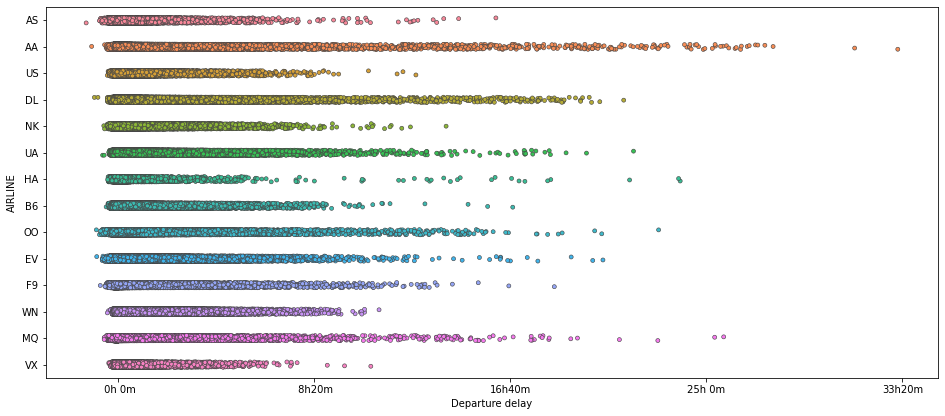

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

fig = plt.figure(1, figsize=(16,15))
gs=gridspec.GridSpec(2,2)   
ax3=fig.add_subplot(gs[1,:]) 
ax3 = sns.stripplot(y="AIRLINE", x="DEPARTURE_DELAY", data = df, size = 4, linewidth = .6, jitter = True) 
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                          for x in ax3.get_xticks()])
plt.xlabel('Departure delay')

Heat-Map showing Feature-to-Feature and
Feature-to-Label's Pearson Correlation Coefficients

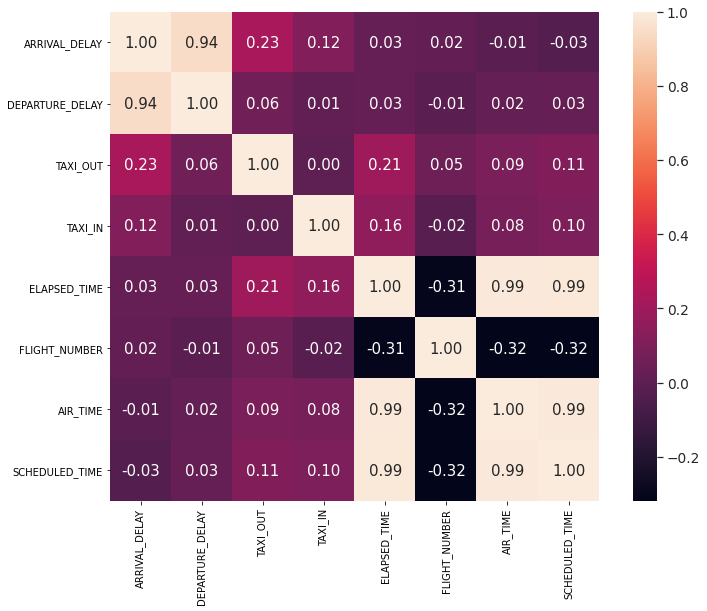

In [ ]:
delcorrmat = df.corr()
k = 18
f, ax = plt.subplots(figsize = (12,9))
cols =delcorrmat.nlargest(k, 'ARRIVAL_DELAY')['ARRIVAL_DELAY'].index
cm = np. corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt= '.2f', annot_kws= {'size': 15}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

from this figure, we can see that delays at arrival are generally lower than at departure. This indicates that airlines adjust their flight speed in order to reduce the delays at arrival

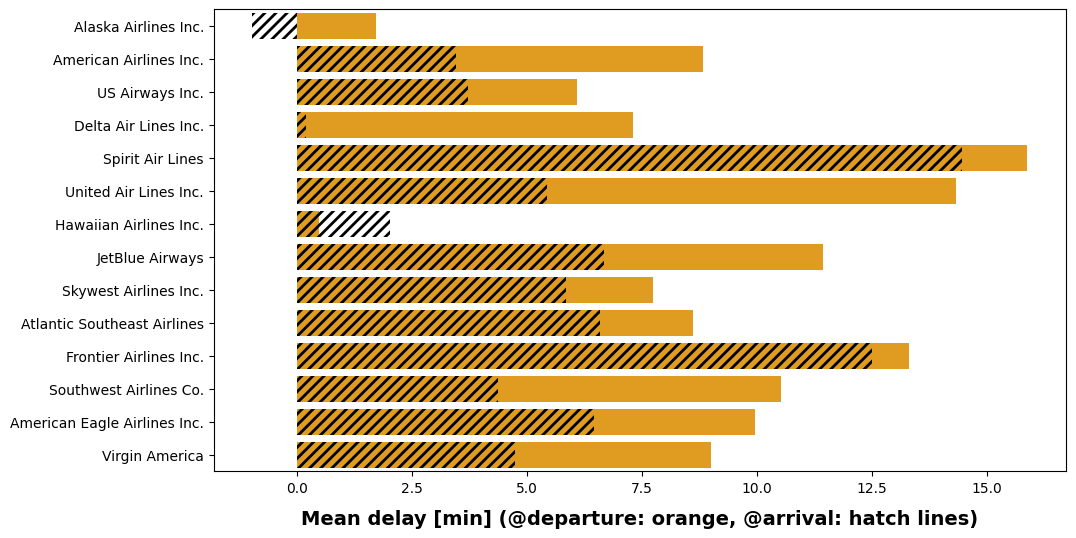

In [ ]:
#delay at arrival is lower than delay at departure 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0  

fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="DEPARTURE_DELAY", y="AIRLINE", data=df, color="orange", ci=None)
ax = sns.barplot(x="ARRIVAL_DELAY", y="AIRLINE", data=df, color="r", hatch = '///',
                 alpha = 0.0, ci=None)
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel('Mean delay [min] (@departure: orange, @arrival: hatch lines)',
           fontsize=14, weight = 'bold', labelpad=10);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714008 entries, 0 to 5819078
Data columns (total 15 columns):
 #   Column               Dtype         
---  ------               -----         
 0   AIRLINE              object        
 1   FLIGHT_NUMBER        int64         
 2   ORIGIN_AIRPORT       object        
 3   DESTINATION_AIRPORT  object        
 4   SCHEDULED_DEPARTURE  datetime64[ns]
 5   DEPARTURE_TIME       object        
 6   DEPARTURE_DELAY      float64       
 7   SCHEDULED_TIME       float64       
 8   ELAPSED_TIME         float64       
 9   AIR_TIME             float64       
 10  SCHEDULED_ARRIVAL    object        
 11  ARRIVAL_TIME         object        
 12  ARRIVAL_DELAY        float64       
 13  TAXI_OUT             float64       
 14  TAXI_IN              float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(6)
memory usage: 697.5+ MB


changing the original_airport to string

In [ ]:
df['ORIGIN_AIRPORT'] = df['ORIGIN_AIRPORT'].astype(str) 
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,TAXI_OUT,TAXI_IN
0,AS,98,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,205.0,194.0,169.0,04:30:00,04:08:00,-22.0,21.0,4.0
1,AA,2336,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,280.0,279.0,263.0,07:50:00,07:41:00,-9.0,12.0,4.0
2,US,840,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,286.0,293.0,266.0,08:06:00,08:11:00,5.0,16.0,11.0
3,AA,258,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,285.0,281.0,258.0,08:05:00,07:56:00,-9.0,15.0,8.0
4,AS,135,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,235.0,215.0,199.0,03:20:00,02:59:00,-21.0,11.0,5.0


I WILL CREATE A MODEL THAT USES 3 WEEK'S PERIOD TO PREDICT THE DELAY OF THE UPCOMING WEEKS.

1st considering 3 weeks, i.e 10th to 31st of JAN

In [ ]:
df_train = df[df['SCHEDULED_DEPARTURE'].apply(lambda x:x.date()) < datetime.date(2015, 1, 10)]
df_test  = df[df['SCHEDULED_DEPARTURE'].apply(lambda x:x.date()) > datetime.date(2015, 1, 10)]
df = df_train

While treating the entire data set, the number of fits were large and I was unable to perform the model. So, I decided to consider only one airline i.e. the 'AMERICAN AIRLINE'. 

In [ ]:
#considering all the flights of AA and see the stats of each that left the airport.
carrier_airline = 'AA'
check_airports = df[(df['AIRLINE'] == carrier_airline)]['DEPARTURE_DELAY'].groupby(
                         df['ORIGIN_AIRPORT']).apply(get_stats).unstack()
check_airports.sort_values('count', ascending = False, inplace = True)
check_airports[:10]

,min,max,count,mean
ORIGIN_AIRPORT,,,,
DFW,-12.0,753.0,3618.0,26.472637
MIA,-11.0,649.0,1250.0,18.996800
ORD,-11.0,420.0,1141.0,34.833479
LAX,-13.0,234.0,798.0,8.843358
JFK,-11.0,891.0,399.0,27.942356
LGA,-13.0,278.0,349.0,19.856734
MCO,-26.0,742.0,275.0,17.181818
BOS,-13.0,1190.0,265.0,14.981132
SFO,-15.0,363.0,263.0,13.802281


During exploration(EDA) we observed that there are 'extreme delays' in case of certain airlines( at times even >10 hrs) which could've been due to any reason(weather, accident or layover etc.). So we will get rid of the extreme delays so that we could avoid bias and our data fits well.


In [ ]:
#the function get_flight_delays calculates the mean flight delays per airline per airport 
def get_flight_delays(df, carrier_airline, id_airport, extreme_values = False):
    df2 = df[(df['AIRLINE'] == carrier_airline) & (df['ORIGIN_AIRPORT'] == id_airport)]
    
# removing extreme values before fitting
    if extreme_values:
        df2['DEPARTURE_DELAY'] = df2['DEPARTURE_DELAY'].apply(lambda x:x if x < 60 else np.nan)
        df2.dropna(how = 'any')
    
# Conversion: date + hour -> hour
    df2.sort_values('SCHEDULED_DEPARTURE', inplace = True)
    df2['hour_depart'] =  df2['SCHEDULED_DEPARTURE'].apply(lambda x:x.time())
   
#regrouping the hour_departure and using groupby fnc to group the data on hour_depart thereby applying unstack fnc
    test2 = df2['DEPARTURE_DELAY'].groupby(df2['hour_depart']).apply(get_stats).unstack()
    test2.reset_index(inplace=True)
#coversion of hour into seconds
    fct = lambda x:x.hour*3600+x.minute*60+x.second
    test2.reset_index(inplace=True)
    test2['hour_depart_min'] = test2['hour_depart'].apply(fct)
    return test2

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
def linear_regression(test2):
  test = test2[['mean', 'hour_depart_min']].dropna(how='any', axis = 0)
  X = np.array(test['hour_depart_min'])
  Y = np.array(test['mean'])
  X = X.reshape(len(X),1)
  Y = Y.reshape(len(Y),1)
  regr = linear_model.LinearRegression()
  regr.fit(X, Y)
  result = regr.predict(X)
  return X, Y, result

In [ ]:
id_airport = 'PHL'
df2 = df[(df['AIRLINE'] == carrier_airline) & (df['ORIGIN_AIRPORT'] == id_airport)]
df2['hour_depart'] =  df2['SCHEDULED_DEPARTURE'].apply(lambda x:x.time())
df2['hour_depart'] = df2['hour_depart'].apply(lambda x:x.hour*3600+x.minute*60+x.second)
# first case we take the initial values
test2 = get_flight_delays(df, carrier_airline, id_airport, False)
X1, Y1, result2 = linear_regression(test2)
# second case we eliminate >1hr delays
test3 = get_flight_delays(df, carrier_airline, id_airport, True)
X2, Y2, result3 = linear_regression(test3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

we would take all the airports into account. In particular, this will allow to predict delays on airports for which the number of data is low with a better accuracy.

In [ ]:
def get_merged_delays(df, carrier_airline):
  list_airports = df[df['AIRLINE'] == carrier_airline]['ORIGIN_AIRPORT'].unique()
  i = 0
  list_columns = ['AIRPORT_ID', 'hour_depart_min', 'mean']
  for id_airport in list_airports:
     test2 = get_flight_delays(df, carrier_airline, id_airport, True)
     test2.loc[:, 'AIRPORT_ID'] = id_airport
     test2 = test2[list_columns]
     test2.dropna(how = 'any', inplace = True)

     if i == 0 :
       merged_df = test2.copy()

     else :
       merged_df = pd.concat([merged_df, test2], ignore_index = True)
     i += 1
  return merged_df 


In [ ]:
carrier_airline = 'AA'
merged_df = get_merged_delays(df, carrier_airline)
merged_df.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

(1782, 3)

In the merged_df dataframe, airports are referenced by an identifier given in the ORIGIN_AIRPORT variable. The corresponding labels can't be used directly in a fit and I thus use the one-hot-encoding method:

In [ ]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
integer_encoded = label_encoder.fit_transform(merged_df['AIRPORT_ID'])
#__________________________________________________________
# correspondance between the codes and tags of the airports
zipped = zip(integer_encoded, merged_df['AIRPORT_ID'])
label_airports = list(set(list(zipped)))
label_airports.sort(key = lambda x:x[0])
label_airports[:5]

[(0, 'ABQ'), (1, 'ATL'), (2, 'AUS'), (3, 'BDL'), (4, 'BHM')]

Above, a label is assigned to each airport. The correlation between the label and the original identifier has been saved in the label_airport list. Now I will proceed with the "One Hot Encoding" by creating a matrix where instead of the ORIGIN_AIRPORT variable that contained  M  labels, we build a matrix with  M  columns, filled of 0 and 1 depending on the correspondance with particular airports:

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
b = np.array(merged_df['hour_depart_min'])
b = b.reshape(len(b),1)
X = np.hstack((onehot_encoded, b))
Y = np.array(merged_df['mean'])
Y = Y.reshape(len(Y), 1)
print(X.shape, Y.shape)

(1782, 82) (1782, 1)


The matrices X and Y thus created are used to perform a linear regression

In [ ]:
import sklearn.metrics as metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
predictions = lm.predict(X)
print("MSE =", metrics.mean_squared_error(predictions, Y))

MSE = 69.38929851329762


We use MSE for evaluation of the performance of our regression model. Our main goal is to see if MSE decreases as our algo gains more and more experience. So we'll tally that  in the ahead codes.

In [ ]:
#we can have a feeling of the quality of the fit by considering the number of predictions where the differences with real values is greater than 15 minutes:
icount = 0
for i, val in enumerate(Y):
    if abs(val-predictions[i]) > 15: icount += 1
'{:.2f}%'.format(icount / len(predictions) * 100)

'7.30%'

In practice, this model tends to underestimate the large delays, which can be seen in the following figure:

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


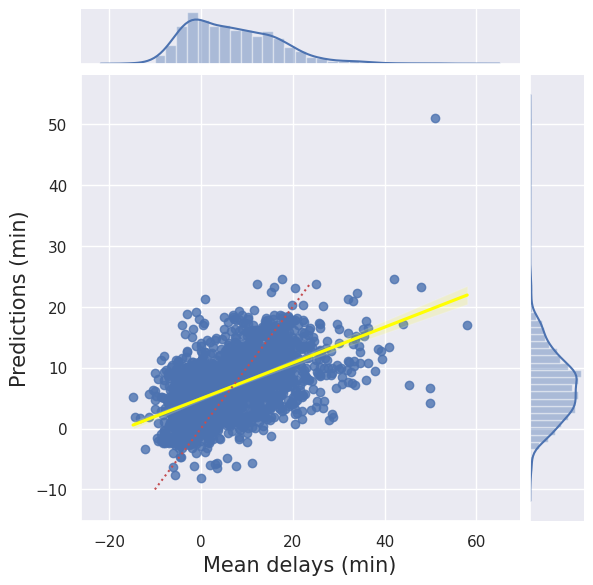

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
tips = pd.DataFrame()
tips["prediction"] = pd.Series([float(s) for s in predictions])
tips["original_data"] = pd.Series([float(s) for s in Y]) 
sns.jointplot(x="original_data", y="prediction", data=tips, size = 6, ratio = 7, joint_kws={'line_kws':{'color':'yellow'}}, kind='reg')
plt.xlabel('Mean delays (min)', fontsize = 15)
plt.ylabel('Predictions (min)', fontsize = 15)
plt.plot(list(range(-10,25)), list(range(-10,25)), linestyle = ':', color = 'r')
plt.show()

We'll try to improve the algo by using polynomial features instead of linear features 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
regr = linear_model.LinearRegression()
X_ = poly.fit_transform(X)
regr.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
result = regr.predict(X_)
print("MSE =", metrics.mean_squared_error(result, Y))

MSE = 63.786339438004205


we see that there's slight improvement in our MSE score 

delays  > 15 minutes: 6.17%

In [ ]:
icount = 0
for i, val in enumerate(Y):
    if abs(val-result[i]) > 15: icount += 1
'{:.2f}%'.format(icount / len(result) * 100)

'6.17%'

 I will now split the datas in order to train and then test the model. 
 The purpose will be to determine the polynomial degree which allows the best generalization of the predictions:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
X_train.shape

(1247, 82)

In [ ]:
X_test.shape

(535, 82)

we try and use a regularization method and it will show the models which coefficients are the most important

In [ ]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.3,normalize=True)
poly = PolynomialFeatures(degree = 2)
X_ = poly.fit_transform(X_train)
ridgereg.fit(X_, Y_train)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
X_ = poly.fit_transform(X_test)
result = ridgereg.predict(X_)
score = metrics.mean_squared_error(result, Y_test)
print("Mean squared error = ", score)

Mean squared error =  80.74916431022953


we see MSE = 80.7

And we can see that we obtain a reasonnable score.

In [ ]:
score_min = 10000
for pol_order in range(1, 3):
    for alpha in range(0, 20, 2):
        ridgereg = Ridge(alpha = alpha/10, normalize=True)
        poly = PolynomialFeatures(degree = pol_order)
        regr = linear_model.LinearRegression()
        X_ = poly.fit_transform(X_train)
        ridgereg.fit(X_, Y_train)        
        X_ = poly.fit_transform(X_test)
        result = ridgereg.predict(X_)
        score = metrics.mean_squared_error(result, Y_test)        
        if score < score_min:
            score_min = score
            parameters = [alpha/10, pol_order]
        print('n={} alpha={} , MSE = {:<0.5}'.format(pol_order, alpha, score))

n=1 alpha=0 , MSE = 81.013
n=1 alpha=2 , MSE = 80.373
n=1 alpha=4 , MSE = 80.753
n=1 alpha=6 , MSE = 81.493
n=1 alpha=8 , MSE = 82.35
n=1 alpha=10 , MSE = 83.22
n=1 alpha=12 , MSE = 84.059
n=1 alpha=14 , MSE = 84.848
n=1 alpha=16 , MSE = 85.582
n=1 alpha=18 , MSE = 86.259


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


n=2 alpha=0 , MSE = 99.784
n=2 alpha=2 , MSE = 80.628
n=2 alpha=4 , MSE = 80.863
n=2 alpha=6 , MSE = 81.089
n=2 alpha=8 , MSE = 81.339
n=2 alpha=10 , MSE = 81.617
n=2 alpha=12 , MSE = 81.918
n=2 alpha=14 , MSE = 82.234
n=2 alpha=16 , MSE = 82.56
n=2 alpha=18 , MSE = 82.891


the ploynomial of order 2 gives the best genearlized model

Now I use these parameters to test this template over the test set:

In [ ]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha = parameters[0], normalize=True)
poly = PolynomialFeatures(degree = parameters[1])
X_ = poly.fit_transform(X)
ridgereg.fit(X_, Y)
result = ridgereg.predict(X_)
score = metrics.mean_squared_error(result, Y)        
print(score)

70.11788205661459


MSE IS EQUIVALENT TO AN AVERAGE DELAY OF 8.37 MINS

In [ ]:
'Ecart = {:.2f} min'.format(np.sqrt(score))

'Ecart = 8.37 min'

The current MSE score is calculated on all the airports served by American Airlines

In the previous model, I grouped the flights per departure time.I make a model that accounts for both departure and arrival times:

In [ ]:
def create_df(df, carrier_airline):
    df2 = df[df['AIRLINE'] == carrier_airline][['SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DEPARTURE_DELAY']]
    df2.dropna(how = 'any', inplace = True)
    df2['weekday'] = df2['SCHEDULED_DEPARTURE'].apply(lambda x:x.weekday())

    # for greater than 1 hr delays
    df2['DEPARTURE_DELAY'] = df2['DEPARTURE_DELAY'].apply(lambda x:x if x < 60 else np.nan)
    df2.dropna(how = 'any', inplace = True)
    # formating times
    fct = lambda x:x.hour*3600+x.minute*60+x.second
    df2['heure_depart'] = df2['SCHEDULED_DEPARTURE'].apply(lambda x:x.time())
    df2['heure_depart'] = df2['heure_depart'].apply(fct)
    df2['heure_arrivee'] = df2['SCHEDULED_ARRIVAL'].apply(fct)
    df3 = df2.groupby(['heure_depart', 'heure_arrivee', 'ORIGIN_AIRPORT'], as_index = False).mean()
    return df3

In [ ]:
df3 = create_df(df, carrier_airline)    
df3[:5]


,heure_depart,heure_arrivee,ORIGIN_AIRPORT,DEPARTURE_DELAY,weekday
0,300,17640,LAX,1.75,2.50
1,300,17700,LAX,5.50,3.75
2,600,28200,LAX,-6.00,3.25
3,1200,29040,LAX,-4.25,2.50
4,1200,29100,LAX,0.80,3.60


regroupings are made on departure and arrival times, encoding on airports is carried out as before.

In [ ]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
integer_encoded = label_encoder.fit_transform(df3['ORIGIN_AIRPORT'])
#_________________________________________________________
zipped = zip(integer_encoded, df3['ORIGIN_AIRPORT'])
label_airports = list(set(list(zipped)))
label_airports.sort(key = lambda x:x[0])
#_________________________________________________
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
#_________________________________________________
b = np.array(df3[['heure_depart', 'heure_arrivee']])
X = np.hstack((onehot_encoded, b))
Y = np.array(df3['DEPARTURE_DELAY'])
Y = Y.reshape(len(Y), 1)

I therefore separate the data to train and then test the model and peform ridge regression

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)


In [ ]:
score_min = 10000
for pol_order in range(1, 3):
    for alpha in range(0, 20, 2):
        ridgereg = Ridge(alpha = alpha/10, normalize=True)
        poly = PolynomialFeatures(degree = pol_order)
        regr = linear_model.LinearRegression()
        X_ = poly.fit_transform(X_train)
        ridgereg.fit(X_, Y_train)
        
        X_ = poly.fit_transform(X_test)
        result = ridgereg.predict(X_)
        score = metrics.mean_squared_error(result, Y_test)
        if score < score_min:
            score_min = score
            parameters = [alpha, pol_order]

        print("n={} alpha={} , MSE = {:<0.5}".format(pol_order, alpha/10, score))

n=1 alpha=0.0 , MSE = 1.1825e+25
n=1 alpha=0.2 , MSE = 107.39
n=1 alpha=0.4 , MSE = 107.76
n=1 alpha=0.6 , MSE = 108.53
n=1 alpha=0.8 , MSE = 109.46
n=1 alpha=1.0 , MSE = 110.45
n=1 alpha=1.2 , MSE = 111.43
n=1 alpha=1.4 , MSE = 112.39
n=1 alpha=1.6 , MSE = 113.3
n=1 alpha=1.8 , MSE = 114.16


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


n=2 alpha=0.0 , MSE = 5310.6
n=2 alpha=0.2 , MSE = 107.88
n=2 alpha=0.4 , MSE = 107.84
n=2 alpha=0.6 , MSE = 107.87
n=2 alpha=0.8 , MSE = 107.95
n=2 alpha=1.0 , MSE = 108.07
n=2 alpha=1.2 , MSE = 108.24
n=2 alpha=1.4 , MSE = 108.43
n=2 alpha=1.6 , MSE = 108.65
n=2 alpha=1.8 , MSE = 108.88


finding the score on training model

In [ ]:
ridgereg = Ridge(alpha = parameters[0], normalize=True)
poly = PolynomialFeatures(degree = parameters[1])
X_ = poly.fit_transform(X)
ridgereg.fit(X_, Y)
result = ridgereg.predict(X_)
score = metrics.mean_squared_error(result, Y)        
print(score)

103.63622195812516


NOW TESTING OF MODEL

In [ ]:
df3 = create_df(df_test, carrier_airline)    
df3[:5]

,heure_depart,heure_arrivee,ORIGIN_AIRPORT,DEPARTURE_DELAY,weekday
0,60,31740,LAX,-3.000000,6.000000
1,300,5880,CLT,0.750000,3.250000
2,300,17580,LAX,2.705882,2.470588
3,300,17640,LAX,-1.968750,3.031250
4,300,21300,LAX,2.000000,5.000000


In [ ]:
label_conversion = dict()
for s in label_airports:
    label_conversion[s[1]] = s[0]

df3['ORIGIN_AIRPORT'].replace(label_conversion, inplace = True)

for index, label in label_airports:
    temp = df3['ORIGIN_AIRPORT'] == index
    temp = temp.apply(lambda x:1.0 if x else 0.0)
    if index == 0:
        matrix = np.array(temp)
    else:
        matrix = np.vstack((matrix, temp))
matrix = matrix.T

b = np.array(df3[['heure_depart', 'heure_arrivee']])
X_test = np.hstack((matrix, b))
Y_test = np.array(df3['DEPARTURE_DELAY'])
Y_test = Y_test.reshape(len(Y_test), 1)

In [ ]:
X_ = poly.fit_transform(X_test)
result = ridgereg.predict(X_)
score = metrics.mean_squared_error(result, Y_test)
print('MSE = {}'.format(round(score, 2)))

MSE = 73.42


CORRESPONDS TO AN AVG DELAY OF 8.57 MINS.

In [ ]:
'Ecart = {:.2f} min'.format(np.sqrt(score))

'Ecart = 8.57 min'

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


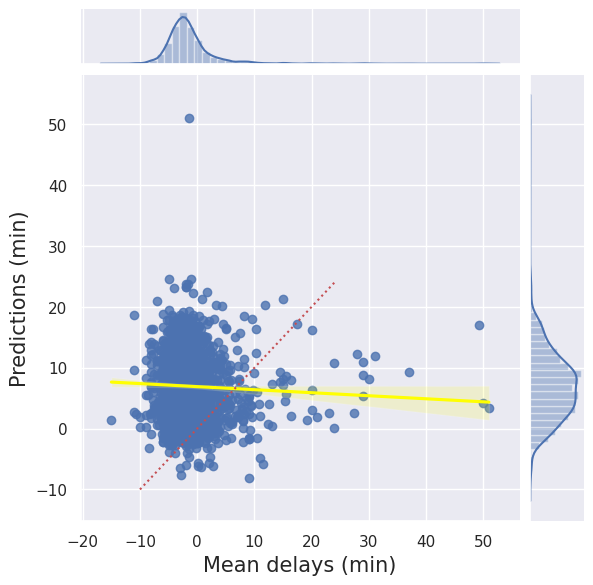

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
tips = pd.DataFrame()
tips["prediction"] = pd.Series([float(s) for s in predictions]) 
tips["original_data"] = pd.Series([float(s) for s in Y_test]) 
sns.jointplot(x="original_data", y="prediction", data=tips, size = 6, ratio = 7,
              joint_kws={'line_kws':{'color':'yellow'}}, kind='reg')
plt.xlabel('Mean delays (min)', fontsize = 15)
plt.ylabel('Predictions (min)', fontsize = 15)
plt.plot(list(range(-10,25)), list(range(-10,25)), linestyle = ':', color = 'r')
plt.show()